# Sample problems from the book
## References:
- https://scikit-learn.org/stable/modules/linear_model.html

## Set up Seaborn and import Iris data set

In [12]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Plot iris data elements

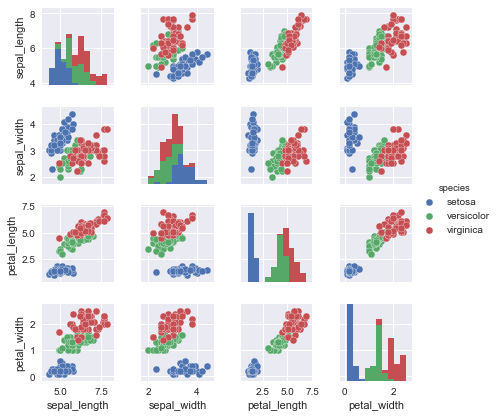

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

## Extract Feature Set

In [13]:
x_iris = iris.drop('species',axis=1)
x_iris.shape

(150, 4)

In [14]:
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extract Target

In [15]:
y_iris = iris['species']
y_iris.shape

(150,)

In [16]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Supervised Learning:
# Simple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x,y);

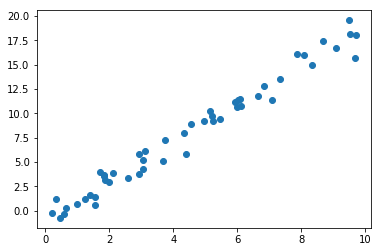

In [2]:
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept='True')

In [4]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [5]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept='True', n_jobs=1, normalize=False)

In [8]:
print('The intercept is:')
print(model.intercept_)
print('The coefficient is:')
print(model.coef_)

The intercept is:
-0.903310725531111
The coefficient is:
[1.9776566]


In [9]:
xfit = np.linspace(-1,11)
xfit = xfit[:,np.newaxis]
yfit = model.predict(xfit)

In [10]:
plt.scatter(x,y)
plt.plot(xfit,yfit);

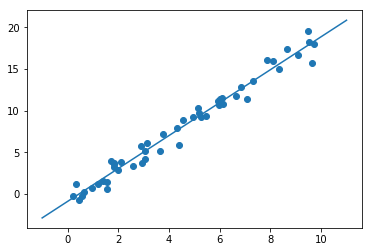

In [11]:
plt.show()

# Supervised Learning:
# Iris Classification

In [18]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state = 1)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Unsupervised Learning:
# Iris Dimensionality Reduction

In [23]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)
X_2D = model.transform(x_iris)

In [28]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species', data=iris, fit_reg=False);

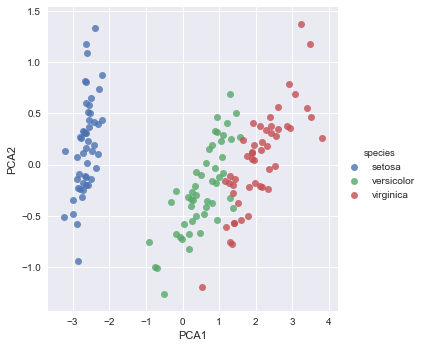

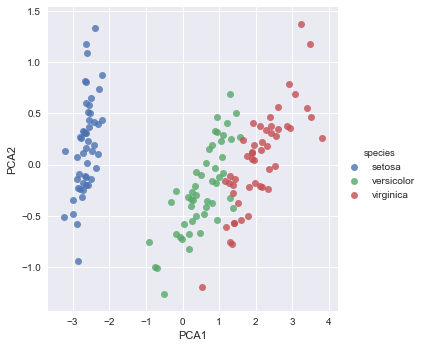

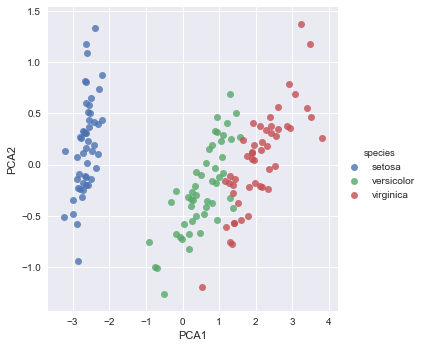

In [31]:
plt.show()